In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utility.config_loader import config
from pathlib import Path
root = Path('home/username/Desktop/risk_score/Credit_Risk_Probability_Model')

In [2]:
data_path = config.load('data.yaml')['data']['source']
path_of_raw  = root / data_path
path_of_raw

PosixPath('home/username/Desktop/risk_score/Credit_Risk_Probability_Model/data/raw/data.csv')

In [4]:
df = pd.read_csv("/home/ermias/Desktop/risk_score/Credit_Risk_Probability_Model/data/raw/data.csv")
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [5]:
df.shape

(95662, 16)

In [17]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [18]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [20]:
df.dtypes


TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [21]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

In [22]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


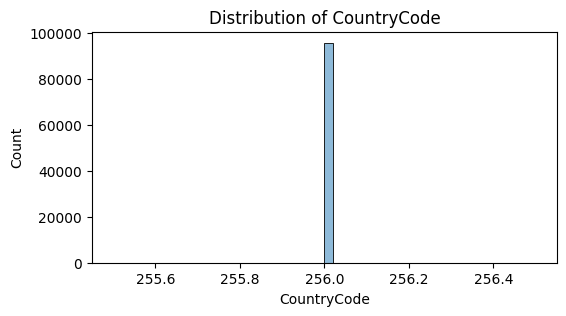

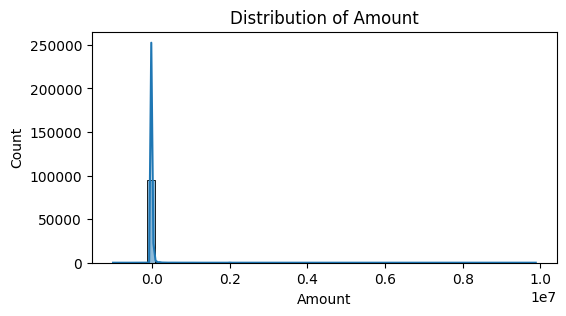

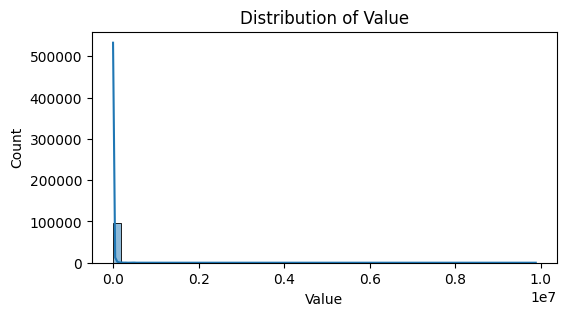

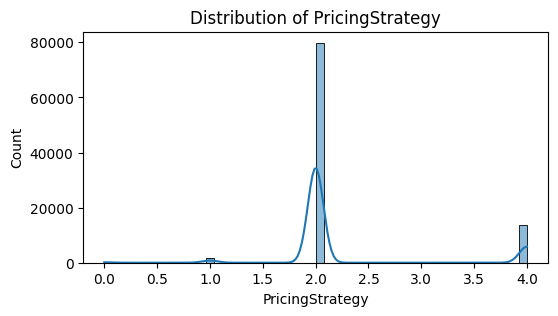

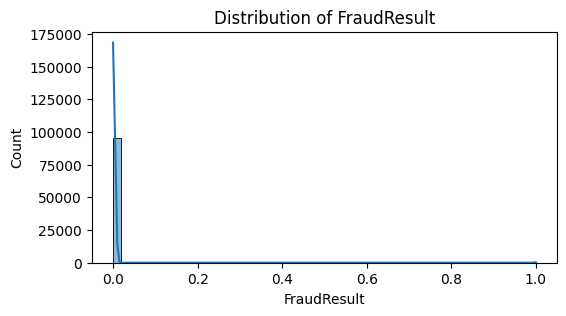

In [23]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


/home/ermias/Desktop/risk_score/Credit_Risk_Probability_Model/venvcr/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


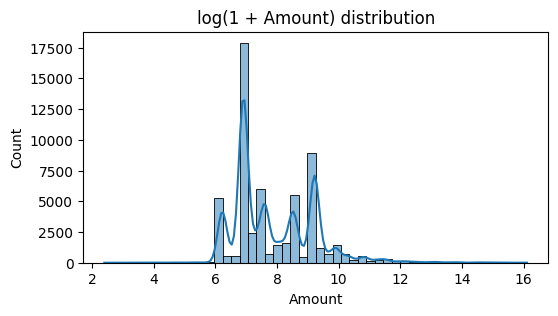

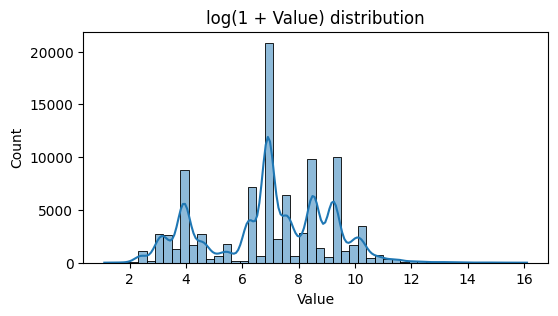

In [24]:
for col in ["Amount", "Value"]:
    plt.figure(figsize=(6, 3))
    sns.histplot(np.log1p(df[col]), bins=50, kde=True)
    plt.title(f"log(1 + {col}) distribution")
    plt.show()


In [25]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

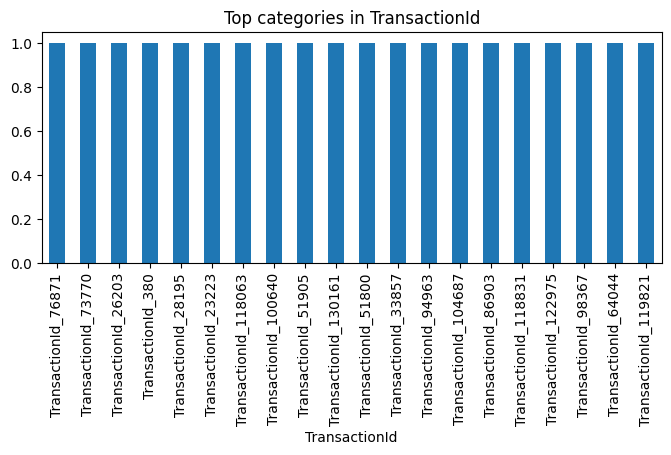

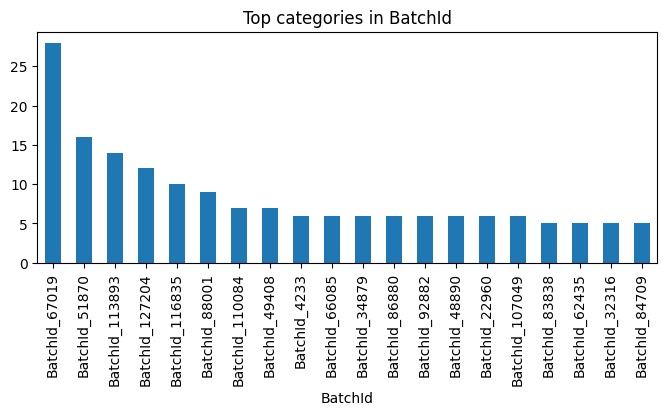

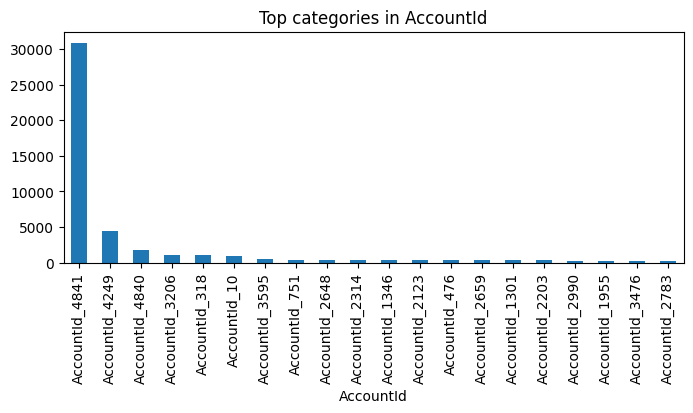

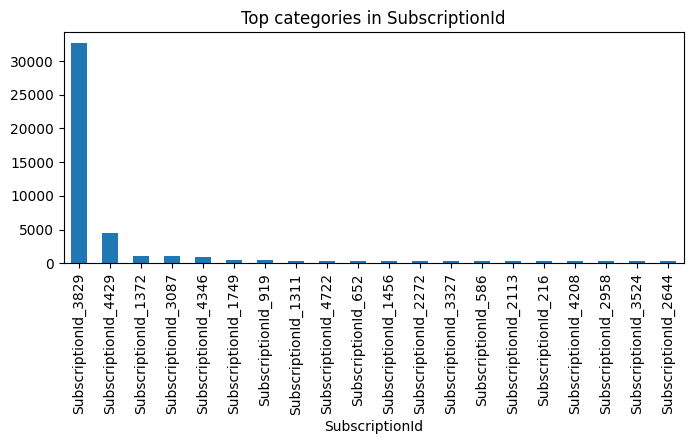

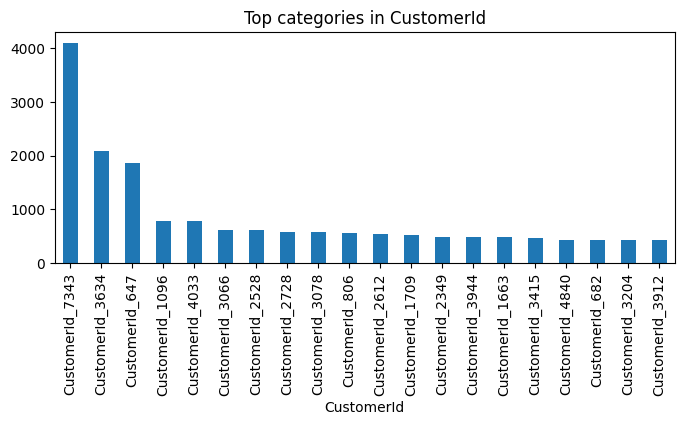

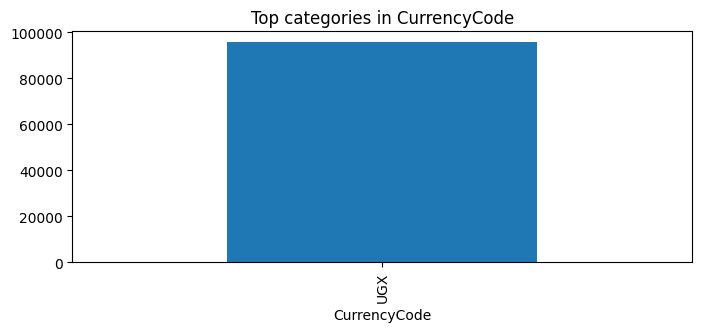

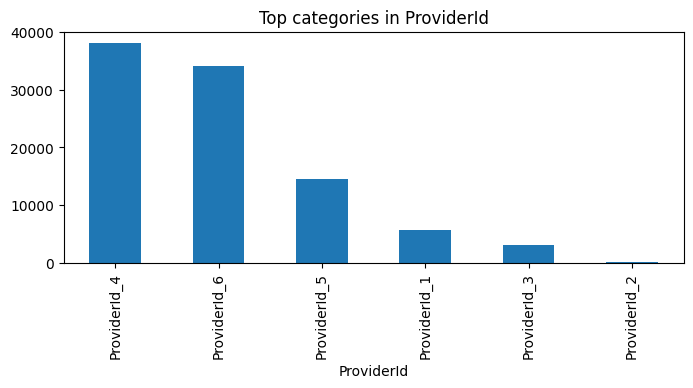

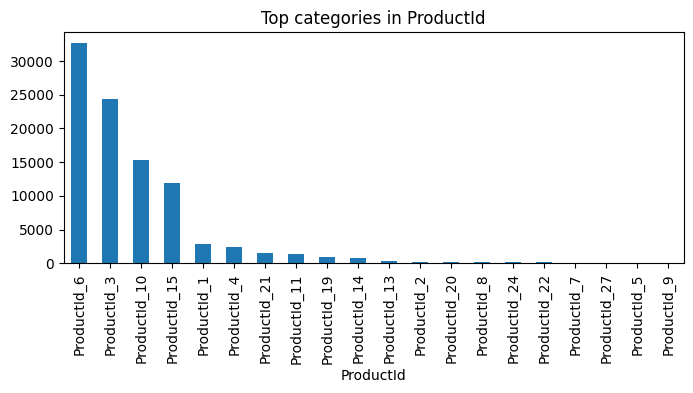

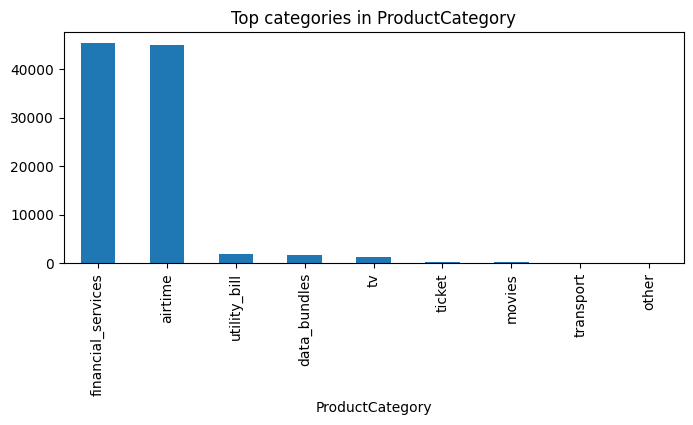

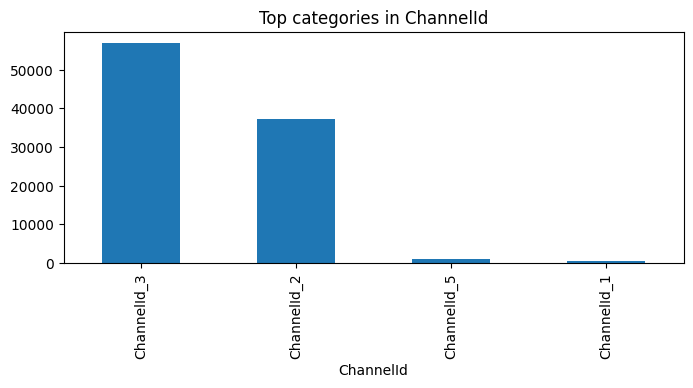

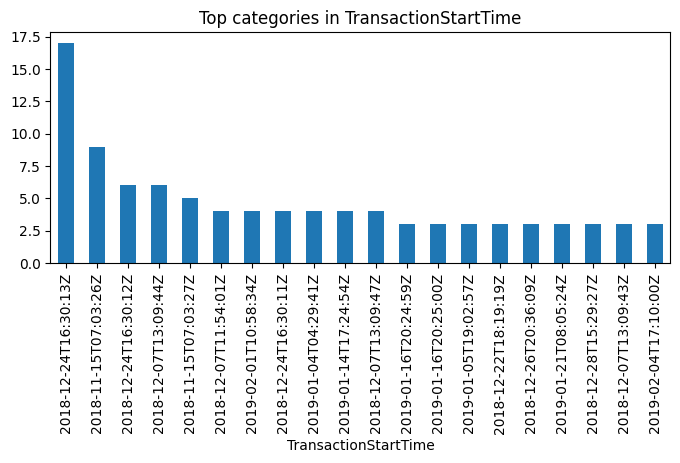

In [26]:
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top categories in {col}")
    plt.show()


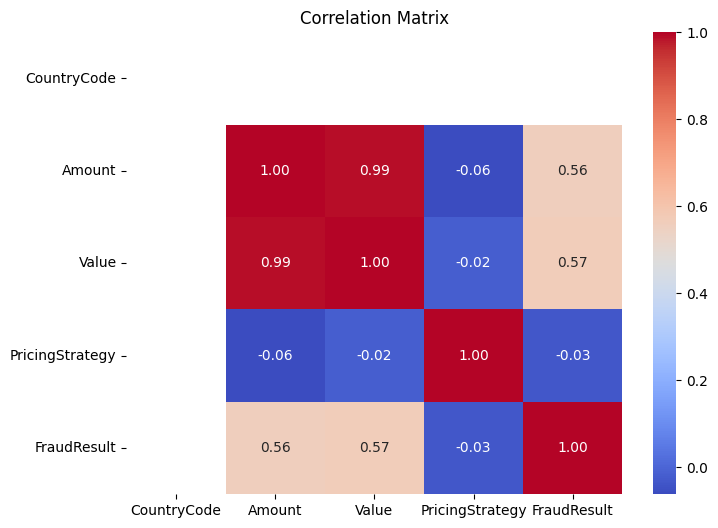

In [27]:
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [28]:
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [29]:
(df.isnull().mean() * 100).sort_values(ascending=False)


TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64

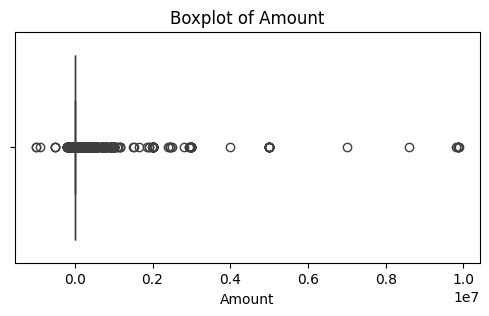

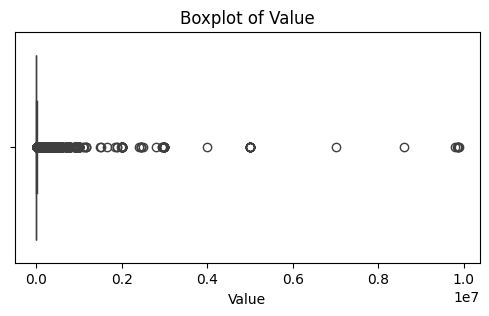

In [30]:
for col in ["Amount", "Value"]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [31]:
df["FraudResult"].value_counts(normalize=True)


FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64

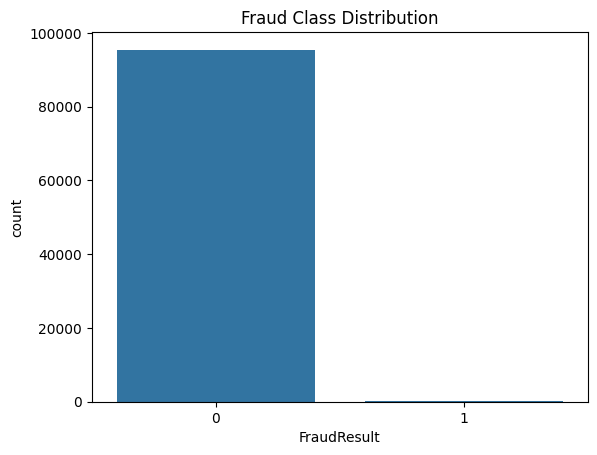

In [32]:
sns.countplot(x="FraudResult", data=df)
plt.title("Fraud Class Distribution")
plt.show()


In [34]:
plt.savefig("amount_distribution.png", dpi=150, bbox_inches="tight")
plt.savefig("channel_distribution.png", dpi=150, bbox_inches="tight")
plt.savefig("amount_boxplot.png", dpi=150, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [ ]:
output_dir = Path("data/eda_outputs")
output_dir.mkdir(exist_ok=True)

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Numerical Summary
num_summary = df[num_cols].describe().T
num_summary['missing'] = df[num_cols].isna().sum()
num_summary.to_csv(output_dir / "numerical_summary.csv")

# Categorical Summary
cat_summary = {}
for col in cat_cols:
    cat_summary[col] = df[col].value_counts().to_dict()
pd.DataFrame(cat_summary).fillna(0).astype(int).to_csv(output_dir / "categorical_summary.csv")

# Correlation Matrix
corr_matrix = df[num_cols].corr()
corr_matrix.to_csv(output_dir / "correlation_matrix.csv")

# Outlier Detection (IQR method)
outliers_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    outliers_summary[col] = len(outliers)
pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['outlier_count']).to_csv(output_dir / "outliers_summary.csv")

# Automated EDA Report
eda_report = []

missing_vals = df.isna().sum()
eda_report.append("### Missing Values\n")
eda_report.append(missing_vals.to_string())
eda_report.append("\n\n")

eda_report.append("### Numerical Feature Insights\n")
for col in num_cols:
    desc = df[col].describe()
    eda_report.append(
        f"{col}: mean={desc['mean']:.2f}, median={desc['50%']:.2f}, std={desc['std']:.2f}, min={desc['min']}, max={desc['max']}"
    )

eda_report.append("\n\n### Categorical Feature Insights\n")
for col in cat_cols:
    top = df[col].value_counts().head(5)
    eda_report.append(f"{col} top 5: {top.to_dict()}")

with open(output_dir / "eda_summary.txt", "w") as f:
    f.write("\n".join(eda_report))

print(f"EDA summaries saved in: {output_dir.resolve()}")
